# 초기화

신경망을 학습시키기 위해서는 가중치와 파라미터 값들을 초기화 시켜야합니다.
그럼 학습을 잘하기 위해서 초기화하는 방법에 대해 알아보겠습니다.

만약 이전 코스를 보셨다면 모델에 초기화를 사용 해보셨을겁니다.
새로운 신경망에 초기화 방법을 어떻게 적용시켜야할까요? 이번 노트북에서 서로 다른 결과를 갖는 초기화 방법을 사용해볼겁니다.


잘 선택된 초기화 방법은 이런 효과를 갖습니다:
- 경사 하강법이 빠르게 작동합니다.
- 낮은 에러값으로 수렴할 확률이 높아집니다.

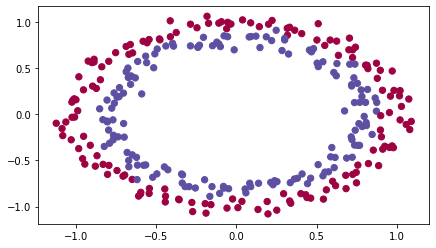

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
from init_utils import sigmoid, relu, compute_loss, forward_propagation, backward_propagation
from init_utils import update_parameters, predict, load_dataset, plot_decision_boundary, predict_dec

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# load image dataset: blue/red dots in circles
train_X, train_Y, test_X, test_Y = load_dataset()

파란색 점과 빨간색 점을 따로 따로 분리시키는 방법이 궁금하실겁니다.

## 1 - 신경망 모델

이미 만들어진 3층 짜리 신경망 모델을 사용할 겁니다.
실험해볼 초기화 방법은 다음과 같습니다.: 
- *Zeros initialization  :*  setting `initialization = "zeros"` in the input argument.
- *Random initialization :* setting `initialization = "random"` in the input argument. This initializes the weights to large random values.  
- *He initialization :* setting `initialization = "he"` in the input argument. This initializes the weights to random values scaled according to a paper by He et al., 2015. 

**Instructions**: 빨리 코드를 읽어보시고 실행시키세요. `model()` 기능을 사용해 3개 초기화 방법을 사용해볼겁니다.

In [2]:
def model(X, Y, learning_rate = 0.01, num_iterations = 15000, print_cost = True, initialization = "he"):
    """
    Implements a three-layer neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (2, number of examples)
    Y -- true "label" vector (containing 0 for red dots; 1 for blue dots), of shape (1, number of examples)
    learning_rate -- learning rate for gradient descent 
    num_iterations -- number of iterations to run gradient descent
    print_cost -- if True, print the cost every 1000 iterations
    initialization -- flag to choose which initialization to use ("zeros","random" or "he")
    
    Returns:
    parameters -- parameters learnt by the model
    """
        
    grads = {}
    costs = [] # to keep track of the loss
    m = X.shape[1] # number of examples
    layers_dims = [X.shape[0], 10, 5, 1]
    
    # Initialize parameters dictionary.
    if initialization == "zeros":
        parameters = initialize_parameters_zeros(layers_dims)
    elif initialization == "random":
        parameters = initialize_parameters_random(layers_dims)
    elif initialization == "he":
        parameters = initialize_parameters_he(layers_dims)

    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID.
        a3, cache = forward_propagation(X, parameters)
        
        # Loss
        cost = compute_loss(a3, Y)

        # Backward propagation.
        grads = backward_propagation(X, Y, cache)
        
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Print the loss every 1000 iterations
        if print_cost and i % 1000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
            costs.append(cost)
            
    # plot the loss
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

## 2 - Zero initialization (0으로 초기화)

신경망에는 초기화 해야하는 파라미터가 2개 있습니다:
- 가중치 벡터 $(W^{[1]}, W^{[2]}, W^{[3]}, ..., W^{[L-1]}, W^{[L]})$
- 편향 벡터 $(b^{[1]}, b^{[2]}, b^{[3]}, ..., b^{[L-1]}, b^{[L]})$

**Exercise**: 매개변수 모두 0으로 초기화 시키는 다음 기능을 실행시켜보세요.
결과를 확인해보세요 아마도 잘 작동하지 않을겁니다.  
참고로 `np.zeros((.., ..))`를 사용해 구조를 맞추세요


In [6]:
# GRADED FUNCTION: initialize_parameters_zeros 

def initialize_parameters_zeros(layers_dims):
    """
    Arguments:
    layer_dims -- 각 층의 사이즈를 갖고있는 리스트 형식
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layers_dims[1], layers_dims[0])
                    b1 -- bias vector of shape (layers_dims[1], 1)
                    ...
                    WL -- weight matrix of shape (layers_dims[L], layers_dims[L-1])
                    bL -- bias vector of shape (layers_dims[L], 1)
    """
    
    parameters = {}
    L = len(layers_dims)            # number of layers in the network
    
    for l in range(1, L):
        parameters['W' + str(l)] = np.zeros((layers_dims[l], layers_dims[l - 1]))
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
    return parameters

In [7]:
parameters = initialize_parameters_zeros([3,2,1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[0. 0. 0.]
 [0. 0. 0.]]
b1 = [[0.]
 [0.]]
W2 = [[0. 0.]]
b2 = [[0.]]


**Expected Output**:

<table> 
    <tr>
    <td>
    W1
    </td>
        <td>
    [[ 0.  0.  0.]
 [ 0.  0.  0.]]
    </td>
    </tr>
    <tr>
    <td>
    b1
    </td>
        <td>
    [[ 0.]
 [ 0.]]
    </td>
    </tr>
    <tr>
    <td>
    W2
    </td>
        <td>
    [[ 0.  0.]]
    </td>
    </tr>
    <tr>
    <td>
    b2
    </td>
        <td>
    [[ 0.]]
    </td>
    </tr>

</table> 

아래 코드를 실행시켜 0으로 초기화 방법을 사용한 15,000번 반복 학습을 시행해보세요

Cost after iteration 0: 0.6931471805599453
Cost after iteration 1000: 0.6931471805599453
Cost after iteration 2000: 0.6931471805599453
Cost after iteration 3000: 0.6931471805599453
Cost after iteration 4000: 0.6931471805599453
Cost after iteration 5000: 0.6931471805599453
Cost after iteration 6000: 0.6931471805599453
Cost after iteration 7000: 0.6931471805599453
Cost after iteration 8000: 0.6931471805599453
Cost after iteration 9000: 0.6931471805599453
Cost after iteration 10000: 0.6931471805599455
Cost after iteration 11000: 0.6931471805599453
Cost after iteration 12000: 0.6931471805599453
Cost after iteration 13000: 0.6931471805599453
Cost after iteration 14000: 0.6931471805599453


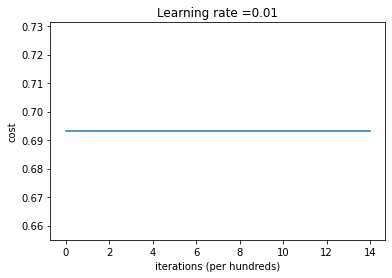

On the train set:
Accuracy: 0.5
On the test set:
Accuracy: 0.5


In [10]:
parameters = model(train_X, train_Y, initialization = "zeros")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

랜덤하게 찍는 것보다 나아 보이지 않는 성능 나왔습니다. 그리고 비용함수 값 또한 낮아지지 않았습니다.

왜그럴까요? 예측 결과인 결정경계를 확인해보죠

In [11]:
print ("predictions_train = " + str(predictions_train))
print ("predictions_test = " + str(predictions_test))

predictions_train = [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0]]
predictions_test = [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


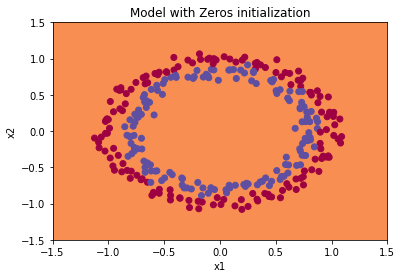

In [12]:
plt.title("Model with Zeros initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

모든 값을 0으로 예측했습니다.

일반적으로 매개변수를 0으로 초기화 하면 신경망이 균형이 깨지지 않는다고합니다.
의미를 이해하기 어렵지만 그래도 설명하자면 매 층마다 각 뉴런들이 같은것을 학습하게 된다는 의미입니다. 결과적으로 매층 같은 값을 갖게되고 학습의 의미가 사라지게 됩니다. 

이런 초기화 방법은 신경망이 단순 선형 분류보다 성능이 떨어지게 만듭니다.

<font color='blue'>  
**기억해야할 점**:    
- 가중치 $W^{[l]}$ 는 균형이 깨지 도록 랜덤한 값을 갖게 해야합니다.  
- 그러나 $b^{[I]}$ 는 0으로 초기화 해도 됩니다. $W^{[l]}$ 가 랜덤한 값을 갖고 있다면 균형 깨질겁니다.


## 3 - Random initialization (랜덤 초기화)

균형을 깨트리기 위해 랜덤하게 초기화를 해봅시다.  
랜덤 초기화로 인해 각 뉴런이 매번 다른 입력값을 받아 학습하게 됩니다.
이번 실험에서는 매우 큰 랜덤한 값으로 초기화 시켜 결과를 확인해보겠습니다.


**Exercise**: 
편향은 0으로 초기화하고 가중치 값은 랜덤하게 초기화 하되 * 10을 적용하고 실행해보겠습니다.

참고로 `np.random.randn(..,..) * 10`와 `np.zeros((.., ..))`를 사용해 가중치와 편향값을 생성해보세요

`np.random.seed(..)`을 사용해 랜덤한 값을 생성하되 결과값을 고정시키는 겁니다. 말로하기에는 이해하기 어렵지만 한번 랜덤하게 생성한 값을 저장해 반복 사용해도 고정된 값이 나오도록 하는 방법입니다. (제대로 잘 작동하는지 확인하기 위함)

In [13]:
# GRADED FUNCTION: initialize_parameters_random

def initialize_parameters_random(layers_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the size of each layer.
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layers_dims[1], layers_dims[0])
                    b1 -- bias vector of shape (layers_dims[1], 1)
                    ...
                    WL -- weight matrix of shape (layers_dims[L], layers_dims[L-1])
                    bL -- bias vector of shape (layers_dims[L], 1)
    """
    
    np.random.seed(3)               # This seed makes sure your "random" numbers will be the as ours
    parameters = {}
    L = len(layers_dims)            # integer representing the number of layers
    
    for i in range(1, L):
        parameters['W' + str(i)] = np.random.randn(layers_dims[i], layers_dims[i - 1]) * 10
        parameters['b' + str(i)] = np.zeros((layers_dims[i], 1))

    return parameters

In [14]:
parameters = initialize_parameters_random([3, 2, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 17.88628473   4.36509851   0.96497468]
 [-18.63492703  -2.77388203  -3.54758979]]
b1 = [[0.]
 [0.]]
W2 = [[-0.82741481 -6.27000677]]
b2 = [[0.]]


**Expected Output**:

<table> 
    <tr>
    <td>
    W1
    </td>
        <td>
    [[ 17.88628473   4.36509851   0.96497468]
 [-18.63492703  -2.77388203  -3.54758979]]
    </td>
    </tr>
    <tr>
    <td>
    b1
    </td>
        <td>
    [[ 0.]
 [ 0.]]
    </td>
    </tr>
    <tr>
    <td>
    W2
    </td>
        <td>
    [[-0.82741481 -6.27000677]]
    </td>
    </tr>
    <tr>
    <td>
    b2
    </td>
        <td>
    [[ 0.]]
    </td>
    </tr>

</table> 

랜덤 초기화를 사용해 15,000 반복 학습을 실행시켜보세요 

C:\Users\hong\Desktop\Course2\week5\Initialization\init_utils.py:145: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
C:\Users\hong\Desktop\Course2\week5\Initialization\init_utils.py:145: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)


Cost after iteration 0: inf
Cost after iteration 1000: 0.6250982793959966
Cost after iteration 2000: 0.5981216596703697
Cost after iteration 3000: 0.5638417572298645
Cost after iteration 4000: 0.5501703049199763
Cost after iteration 5000: 0.5444632909664456
Cost after iteration 6000: 0.5374513807000807
Cost after iteration 7000: 0.4764042074074983
Cost after iteration 8000: 0.39781492295092263
Cost after iteration 9000: 0.3934764028765484
Cost after iteration 10000: 0.3920295461882659
Cost after iteration 11000: 0.38924598135108
Cost after iteration 12000: 0.3861547485712325
Cost after iteration 13000: 0.384984728909703
Cost after iteration 14000: 0.3827828308349524


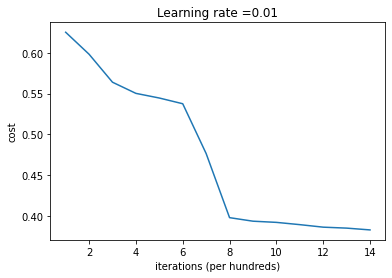

On the train set:
Accuracy: 0.83
On the test set:
Accuracy: 0.86


In [15]:
parameters = model(train_X, train_Y, initialization = "random")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

반복을 0회 이후 비용함수 값이 "inf"가 나오는 것은 반올림 때문입니다.
이것은 수치적으로 좀 더 정교하게 적용하면 고쳐집니다. 이번 문제에서는 걱정할 대상이 아닙니다~!

어찌됐건 균형을 무너졌고 더 좋은 성능을 보입니다. 그리고 예측값을 모두 0으로 하지도 않습니다.

In [16]:
print (predictions_train)
print (predictions_test)

[[1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1
  1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0
  0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0
  1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0
  0 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1
  1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1
  0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1
  1 1 0 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1
  1 1 1 1 0 0 0 1 1 1 1 0]]
[[1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1
  0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0
  1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0]]


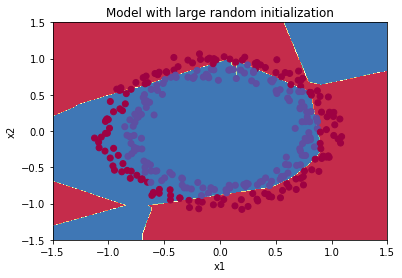

In [17]:
plt.title("Model with large random initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

**관찰 결과**:
- 시작점의 비용함수 값이 매우 큽니다.원인은 바로 초기화 된 가중치 값이 큰 것입니다. 마지막 활성함수 sigmoid 결과 값이 0과 1에 가까운 값이 나와야하는데 좀 다르게 나오면 엄청 큰 손실값이 나오기 때문입니다. $\log(a^{[3]}) = \log(0)$ 에 의해 loss 값이 거의 무한에 가까워집니다.
- 잘못된 초기화는 경사 소실 또는 발산을 일으킵니다. 둘다 최적화를 느리게하는 원인입니다.
- 만약 더 많이 학습한다면 결과는 더 좋아질겁니다. 따라서 가중치를 크게 잡는다면 최적화 속도가 늦어진다는 의미를 갖습니다.

<font color='blue'>  
**정리**:  
- 가중치를 큰 값으로 초기화하는 것은 비효율적이다.  
- 작은 값으로 초기화 하는게 더 좋은 성능을 발휘할겁니다.   
- 질문: 얼마나 작아야 좋을까요? ㅎㅎ

## 4 - He initialization

마지막으로 "He Initialization"를 사용해봅시다.   
이 He 는 처음으로 사용한 저자 He에 의해 생겼습니다. (만약 "Xavier initialization"을 들어봤다면 이해하기가 좀 더 쉬울겁니다. "He initialization" 과 비슷합니다. **Xavier** 는 가중치 값에 `sqrt(1./layers_dims[l-1])`을 나눴고 **He**는 `sqrt(2./layers_dims[l-1])`를 사용했습니다)



**Exercise**: 아래 코드를 실행시켜 He initialization을 수행해보세요

**Hint**: 이전에 사용한 `initialize_parameters_random(...)`와 비슷합니다.
딱 한개 차이는 랜덤한 가중치에 $\sqrt{\frac{2}{\text{dimension of the previous layer}}}$를 곱하는 겁니다. 그리고 He initialization은 활성함수 ReLU를 적용하는것이 통상적인 방법입니다.

In [19]:
# GRADED FUNCTION: initialize_parameters_he

def initialize_parameters_he(layers_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the size of each layer.
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layers_dims[1], layers_dims[0])
                    b1 -- bias vector of shape (layers_dims[1], 1)
                    ...
                    WL -- weight matrix of shape (layers_dims[L], layers_dims[L-1])
                    bL -- bias vector of shape (layers_dims[L], 1)
    """
    
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims) - 1 # integer representing the number of layers
     
    for i in range(1, L + 1):
        parameters['W' + str(i)] = np.random.randn(layers_dims[i], layers_dims[i - 1]) * np.sqrt(2./layers_dims[i-1])
        parameters['b' + str(i)] = np.zeros((layers_dims[i], 1))
        
    return parameters

In [20]:
parameters = initialize_parameters_he([2, 4, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 1.78862847  0.43650985]
 [ 0.09649747 -1.8634927 ]
 [-0.2773882  -0.35475898]
 [-0.08274148 -0.62700068]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.03098412 -0.33744411 -0.92904268  0.62552248]]
b2 = [[0.]]


**Expected Output**:

<table> 
    <tr>
    <td>
    W1
    </td>
        <td>
    [[ 1.78862847  0.43650985]
 [ 0.09649747 -1.8634927 ]
 [-0.2773882  -0.35475898]
 [-0.08274148 -0.62700068]]
    </td>
    </tr>
    <tr>
    <td>
    b1
    </td>
        <td>
    [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
    </td>
    </tr>
    <tr>
    <td>
    W2
    </td>
        <td>
    [[-0.03098412 -0.33744411 -0.92904268  0.62552248]]
    </td>
    </tr>
    <tr>
    <td>
    b2
    </td>
        <td>
    [[ 0.]]
    </td>
    </tr>

</table> 

Run the following code to train your model on 15,000 iterations using He initialization.

Cost after iteration 0: 0.8830537463419761
Cost after iteration 1000: 0.6879825919728063
Cost after iteration 2000: 0.6751286264523371
Cost after iteration 3000: 0.6526117768893807
Cost after iteration 4000: 0.6082958970572937
Cost after iteration 5000: 0.5304944491717495
Cost after iteration 6000: 0.4138645817071793
Cost after iteration 7000: 0.3117803464844441
Cost after iteration 8000: 0.23696215330322556
Cost after iteration 9000: 0.18597287209206828
Cost after iteration 10000: 0.15015556280371808
Cost after iteration 11000: 0.12325079292273548
Cost after iteration 12000: 0.09917746546525937
Cost after iteration 13000: 0.08457055954024274
Cost after iteration 14000: 0.07357895962677366


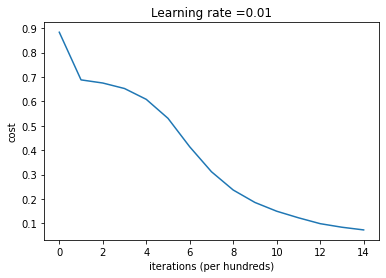

On the train set:
Accuracy: 0.9933333333333333
On the test set:
Accuracy: 0.96


In [21]:
parameters = model(train_X, train_Y, initialization = "he")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

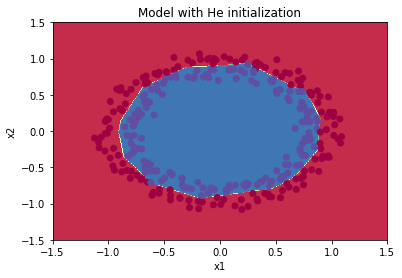

In [22]:
plt.title("Model with He initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

**관찰 결과**:
- 적은 반복횟수로 파란색 점과 빨간색 점을 매우 정확하게 구분해냈습니다.


## 5 - 결론

여러 초기화 방법을 실행해보고 결과를 확인해 봤습니다.  
학습 횟수가 같고 매개변수를 같은 값으로 설정했을때 성능 비교시 다음과 같습니다:  

<table> 
    <tr>
        <td>
        Model
        </td>
        <td>
        Train accuracy
        </td>
        <td>
        Problem/Comment
        </td>
    </tr>
        <td>
        3-layer NN with zeros initialization
        </td>
        <td>
        50%
        </td>
        <td>
        fails to break symmetry
        </td>
    <tr>
        <td>
        3-layer NN with large random initialization
        </td>
        <td>
        83%
        </td>
        <td>
        too large weights 
        </td>
    </tr>
    <tr>
        <td>
        3-layer NN with He initialization
        </td>
        <td>
        99%
        </td>
        <td>
        recommended method
        </td>
    </tr>
</table> 

<font color='blue'>  
**기억해야할 내용!!**:  
- 초기화 방법에 따라 다른 결과가 나옵니다!!
- 랜덤 초기화 방법은 균형을 무너뜨리고 그 의미는 각 레이어와 희든 유닛이 매번 다른것을 학습한다는 의미입니다.
- 매개변수값을 너무 크게 설정하지마세요
- He 초기화 방법에는 ReLU 활성함수를 사용하세요
